<a href="https://colab.research.google.com/github/Kuboz46/data-science-bootcamp/blob/main/06_uczenie_maszynowe/Skrypt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aktualizacja biblioteki scikit-learn

In [ ]:
pip install scikit-learn

In [ ]:
pip install -q --upgrade scikit-learn

In [1]:
import sklearn
sklearn.__version__

'1.2.2'

Klasyfikacja

In [2]:
import numpy as np
from sklearn import datasets

np.random.seed(10)
raw_data = datasets.load_iris()
raw_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
raw_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
print(raw_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
data = raw_data.data
target = raw_data.target

In [6]:
print(data.shape)
print(target.shape)

(150, 4)
(150,)


In [7]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(data, target, test_size = 0.3)

In [8]:
print(data_train.shape)
print(target_train.shape)

(105, 4)
(105,)


In [9]:
print(data_test.shape)
print(target_test.shape)

(45, 4)
(45,)


In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(data_train, target_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
target_pred = model.predict(data_test)
target_pred

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0,
       1])

In [12]:
from sklearn.metrics import confusion_matrix

confusion_matrix(target_test, target_pred)

array([[14,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 14]])

In [13]:
from sklearn.metrics import classification_report

print(classification_report(target_test, target_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Import bibliotek

In [14]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

Metryki - Klasyfikacja binarna

Accuracy - Dokładność klasyfikacji

In [15]:
y_true = np.array([1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1])
y_pred = np.array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1])

In [16]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true, y_pred)

0.8

In [17]:
results = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
results

,y_true,y_pred
0,1,0
1,0,0
2,1,1
3,1,1
4,0,0
5,1,1
6,1,0
7,0,0
8,1,1
9,0,1


In [18]:
results = results.sort_values(by = 'y_true')
results = results.reset_index(drop = True)
results['sample'] = results.index + 1
results

,y_true,y_pred,sample
0,0,0,1
1,0,0,2
2,0,0,3
3,0,0,4
4,0,0,5
5,0,0,6
6,0,0,7
7,0,0,8
8,0,1,9
9,0,1,10


In [19]:
fig = make_subplots(rows = 2, cols = 1)
fig.add_trace(go.Scatter(x = results['sample'], y = results['y_true'], mode = 'markers', name = 'y_true'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = results['sample'], y = results['y_pred'], mode = 'markers', name = 'y_pred'), row = 2, col = 1)
fig.update_layout(width = 900, height = 500, title = 'Klasyfikator binarny')
fig.show()

Macierz konfuzji/pomyłek

In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, y_pred)

array([[ 8,  2],
       [ 4, 16]])

In [21]:
cm = confusion_matrix(y_true, y_pred)

import plotly.figure_factory as ff

def plot_confusion_matrix(cm):
  cm = cm[::-1]
  cm = pd.DataFrame(cm, columns = ['pred_0', 'pred_1'], index = ['true_1', 'true_0'])

  fig = ff.create_annotated_heatmap(z = cm.values, x = list(cm.columns), y = list(cm.index), colorscale = 'ice', showscale = True, reversescale = True)
  fig.update_layout(width = 500, height = 500, title = 'Confusion Matrix', font_size = 16)
  fig.show()

plot_confusion_matrix(cm)

In [22]:
tn, fp, fn, tp = cm.ravel()
print(f'TN - True Negative: {tn}')
print(f'FP - False Positive: {fp}')
print(f'FN - False Negative: {fn}')
print(f'TP - True Positive: {tp}')

TN - True Negative: 8
FP - False Positive: 2
FN - False Negative: 4
TP - True Positive: 16


In [23]:
# Type I error - False Positive Rate
fpr = fp / (fp + tn)
fpr

0.2

In [24]:
# Type II error - False Negative Rate
fnr = fn / (fn + tp)
fnr

0.2

In [25]:
# Precision - ile obserwacji przewidywanych jako pozytywne są w rzeczywistości pozytywne
precision = tp / (tp + fp)
print(precision)

0.8888888888888888


In [26]:
# Recall - jak wiele obserwacji z wszystkich pozytywnych sklasyfikowaliśmy jako pozytywne
recall = tp / (tp + fn)
print(recall)

0.8


Krzywa ROC

In [27]:
from sklearn.metrics import roc_curve

fpr, tpr, thresh = roc_curve(y_true, y_pred, pos_label = 1)
roc = pd.DataFrame({'fpr': fpr, 'tpr': tpr})
roc

,fpr,tpr
0,0.0,0.0
1,0.2,0.8
2,1.0,1.0


In [28]:
def plot_roc_curve(y_true, y_pred):
  # Binary classification
  from sklearn.metrics import roc_curve
  fpr, tpr, tresh = roc_curve(y_true, y_pred, pos_label = 1)

  fig = go.Figure(data = [go.Scatter(x = roc['fpr'], y = roc['tpr'], line_color = 'red', name = 'ROC Curve'),
                  go.Scatter(x = [0, 1], y = [0, 1], mode = 'lines', line_dash = 'dash', line_color = 'navy')],
                  layout = go.Layout(xaxis_title = 'False Positive Rate',
                                     yaxis_title = 'True Positive Rate',
                                     title = 'ROC Curve',
                                     showlegend = False,
                                     width = 800,
                                     height = 400))
  fig.show()
plot_roc_curve(y_true, y_pred)

Metryki - Klasyfikacja wieloklasowa

In [29]:
y_true = np.array([1, 0, 1, 2, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2])
y_pred = np.array([0, 0, 1, 2, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 1, 1, 1, 2, 2])

accuracy_score(y_true, y_pred)

0.7241379310344828

Macierz konfuzji/pomyłek

In [30]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[ 6,  1,  0],
       [ 3, 10,  2],
       [ 0,  2,  5]])

In [31]:
def plot_confusion_matrix(cm):
  cm = cm[::-1]
  cm = pd.DataFrame(cm, columns = ['pred_0', 'pred_1', 'pred_2'], index = ['true_2', 'true_1', 'true_0'])

  fig = ff.create_annotated_heatmap(z = cm.values, x = list(cm.columns), y = list(cm.index), colorscale = 'ice', showscale = True, reversescale = True)
  fig.update_layout(width = 400, height = 400, title = 'Confusion Matrix', font_size = 16)
  fig.show()

plot_confusion_matrix(cm)

Raport klasyfikacji

In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.86      0.75         7
           1       0.77      0.67      0.71        15
           2       0.71      0.71      0.71         7

    accuracy                           0.72        29
   macro avg       0.72      0.75      0.73        29
weighted avg       0.73      0.72      0.72        29



In [33]:
print(classification_report(y_true, y_pred, target_names = ['label_1', 'label_2', 'label_3']))

              precision    recall  f1-score   support

     label_1       0.67      0.86      0.75         7
     label_2       0.77      0.67      0.71        15
     label_3       0.71      0.71      0.71         7

    accuracy                           0.72        29
   macro avg       0.72      0.75      0.73        29
weighted avg       0.73      0.72      0.72        29



Metryki - Problem regresji:

Import bibliotek

In [34]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [35]:
y_true = 100 + 20 * np.random.randn(50)
y_true

array([ 90.35813722, 101.79175225, 116.53997245,  60.9097576 ,
       102.34951322,  61.85086224,  81.5418147 , 109.39502868,
        97.11266474,  91.99723296,  94.08032294, 116.96417218,
       114.1366091 ,  84.25462148, 105.8588145 ,  90.58385497,
       148.08651212,  85.21286523,  93.74342485,  93.02236164,
        91.21947528, 102.82208336, 105.4609864 ,  67.62858504,
        88.53773277,  73.59104908, 124.72410652, 149.30650164,
       127.66464459, 106.92466231, 120.45032214, 103.33620534,
       133.13433249, 113.35779218,  95.40106712,  77.40897611,
        87.20074792, 106.27661043,  75.48328039,  95.56413727,
       126.7985262 , 100.58619422, 139.70771492, 128.94331201,
        94.24741173,  72.81378854,  99.0391735 ,  90.3842532 ,
       107.55506172, 132.28815948])

In [36]:
y_pred = y_true + 10 * np.random.randn(50)
y_pred

array([ 79.12709687,  97.90447278, 119.86347195,  72.25948933,
       107.45665733,  65.99383865,  94.98730894, 114.33018185,
        94.74262289,  92.57008446,  87.00960847, 122.43082056,
       123.56161318,  54.45865376, 118.040303  ,  90.01864774,
       152.69539664,  91.83660535,  70.79239156,  81.06306852,
        87.88846365,  94.90817565, 108.20271421,  62.47948582,
        71.4270208 ,  79.71402221, 135.72540026, 154.95002691,
       120.53665022, 104.31606752, 125.93460281, 109.36819584,
       143.20294388, 110.4135321 ,  81.19226197,  70.61950837,
        92.53959601, 113.71635447,  97.73377677,  96.73595147,
       129.2446714 ,  98.81320599, 135.65041965, 136.76106392,
        97.78218787,  70.74099368,  88.24219966,  89.15355491,
       103.64523987, 144.8398968 ])

In [37]:
results = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
results.head()

,y_true,y_pred
0,90.358137,79.127097
1,101.791752,97.904473
2,116.539972,119.863472
3,60.909758,72.259489
4,102.349513,107.456657


In [38]:
results['error'] = results['y_true'] - results['y_pred']
results.head()

,y_true,y_pred,error
0,90.358137,79.127097,11.231040
1,101.791752,97.904473,3.887279
2,116.539972,119.863472,-3.323499
3,60.909758,72.259489,-11.349732
4,102.349513,107.456657,-5.107144


Interpretacja graficzna

In [39]:
def plot_regression_results(y_true, y_pred):
  results = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
  min = results[['y_true', 'y_pred']].min().min()
  max = results[['y_true', 'y_pred']].max().max()

  fig = go.Figure(data = [go.Scatter(x = results['y_true'], y = results['y_pred'], mode = 'markers'),
                          go.Scatter(x = [min, max], y = [min, max])],
                  layout = go.Layout(showlegend = False, width = 800,
                                     xaxis_title = 'y_true',
                                     yaxis_title = 'y_pred',
                                     title = 'Regression results'))
  fig.show()
plot_regression_results(y_true, y_pred)

In [40]:
y_true = 100 + 20 * np.random.randn(1000)
y_pred = y_true + 10 * np.random.randn(1000)
results = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
results['error'] = results['y_true'] - results['y_pred']

px.histogram(results, x = 'error', nbins = 50, width = 800)

Mean Absolute Error - Średni błąd bezwzględny

In [41]:
def mean_absolute_error(y_true, y_pred):
  return abs(y_true - y_pred).sum() / len(y_true)

mean_absolute_error(y_true, y_pred)

7.863805864805474

In [42]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true, y_pred)

7.863805864805474

Mean Squared Error - MSE - Błąd średniokwadratowy

In [43]:
def mean_squared_error(y_true, y_pred):
  return ((y_true - y_pred) ** 2).sum() / len(y_true)

mean_squared_error(y_true, y_pred)

96.91374601207322

In [44]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_true, y_pred)

96.91374601207322

Root Mean Squared Error - RMSE - Pierwiastek błędu średniokwadratowego

In [45]:
def root_mean_squared_error(y_true, y_pred):
  return np.sqrt(((y_true - y_pred) ** 2).sum() / len(y_true))

root_mean_squared_error(y_true, y_pred)

9.84447794512605

In [46]:
np.sqrt(mean_squared_error(y_true, y_pred))

9.84447794512605

Max Error - Błąd maksymalny

In [47]:
def max_error(y_true, y_pred):
  return abs(y_true - y_pred).max()

In [48]:
max_error(y_true, y_pred)

36.0916070746341

In [49]:
from sklearn.metrics import max_error

max_error(y_true, y_pred)

36.0916070746341

R2 score - współczynnik determinacji

In [50]:
from sklearn.metrics import r2_score

r2_score(y_true, y_pred)

0.7298796298913701

In [51]:
def r2_score(y_true, y_pred):
  numerator = ((y_true - y_pred) ** 2).sum()
  denominator = ((y_true - y_true.mean()) ** 2).sum()
  try:
    r2 = 1 - numerator / denominator
  except ZeroDivisionError:
    print('Dzielenie przez zero')
  return r2

In [52]:
r2_score(y_true, y_pred)

0.7298796298913701

In [53]:
import sklearn
sklearn.__version__

'1.2.2'

Regresja Liniowa - wprowadzenie

In [54]:
import numpy as np

X = np.arange(0, 50, 0.5)
noise = 10 * np.random.randn(100)
y = 2 * X + 100 + noise
X = X.reshape(-1, 1)

print('Rozmiar X:', X.shape)
print('Rozmiar y:', y.shape)

Rozmiar X: (100, 1)
Rozmiar y: (100,)


Podział danych na zbiór treningowy i testowy

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (75, 1)
X_test shape: (25, 1)
y_train shape: (75,)
y_test shape: (25,)


Wizualizacja

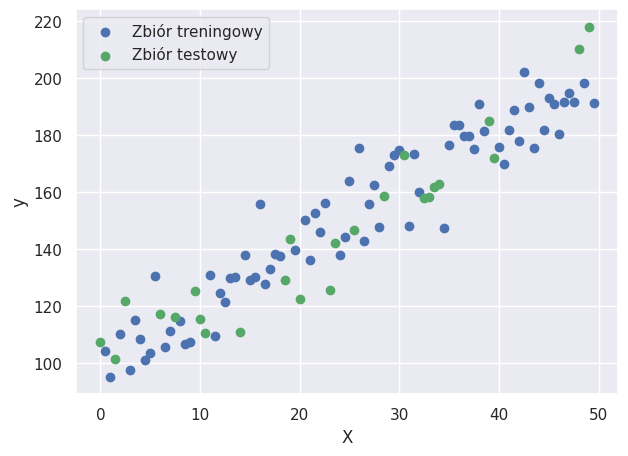

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize = (7, 5))
plt.scatter(X_train, y_train, c = 'b', label = 'Zbiór treningowy')
plt.scatter(X_test, y_test, c = 'g', label = 'Zbiór testowy')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

Regresja liniowa

In [57]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print(lin_reg.coef_)
print(lin_reg.intercept_)

[2.01202962]
100.91324344063749


Wizualizacja zbioru treningowego i dopasowanego modelu

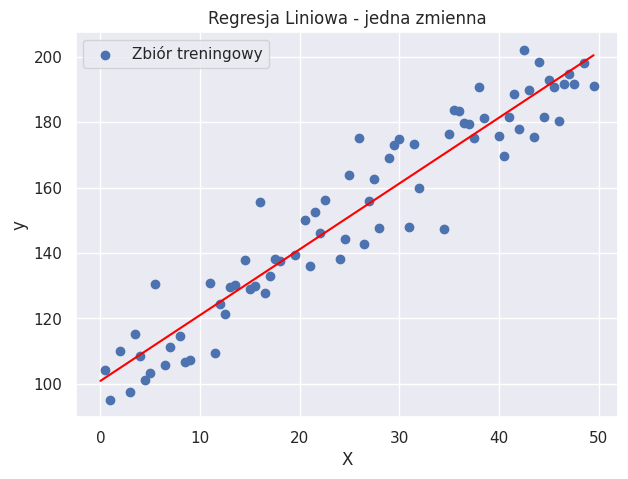

In [58]:
plt.figure(figsize = (7, 5))
plt.title('Regresja Liniowa - jedna zmienna')
plt.scatter(X_train, y_train, c = 'b', label = 'Zbiór treningowy')
plt.plot(X, lin_reg.intercept_ + lin_reg.coef_[0] * X, c = 'red')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

Wizualizacja zbioru testowego i dopasowanego modelu

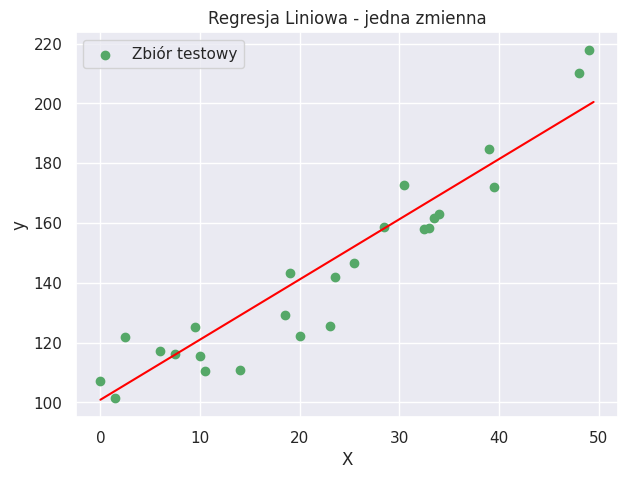

In [59]:
y_pred = lin_reg.predict(X_test)
plt.figure(figsize = (7, 5))
plt.title('Regresja Liniowa - jedna zmienna')
plt.scatter(X_test, y_test, c = 'g', label = 'Zbiór testowy')
plt.plot(X, lin_reg.intercept_ + lin_reg.coef_[0] * X, c = 'red')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

Ocena modelu

In [60]:
lin_reg.score(X_test, y_test)

0.8844983036931537

In [61]:
lin_reg.score?

Przykład złego zastosowania regresji liniowej

[-1.28546305]
17.46016040490207


Text(0, 0.5, 'y')

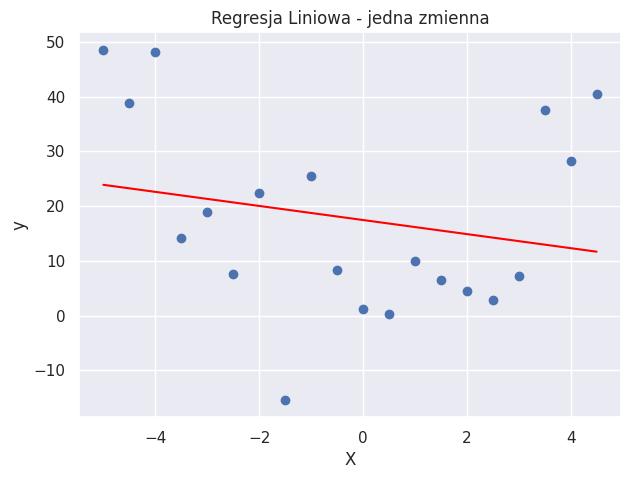

In [62]:
X = np.arange(-5, 5, 0.5)
noise = 10 * np.random.randn(20)
y = 2 * (X ** 2) + 4 + noise
X = X.reshape(-1, 1)

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(lin_reg.coef_)
print(lin_reg.intercept_)

plt.figure(figsize = (7, 5))
plt.title('Regresja Liniowa - jedna zmienna')
plt.plot(X, lin_reg.intercept_ + lin_reg.coef_[0] * X, c = 'red')
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')

Regresja wielomianowa

In [63]:
import sklearn
sklearn.__version__

'1.2.2'

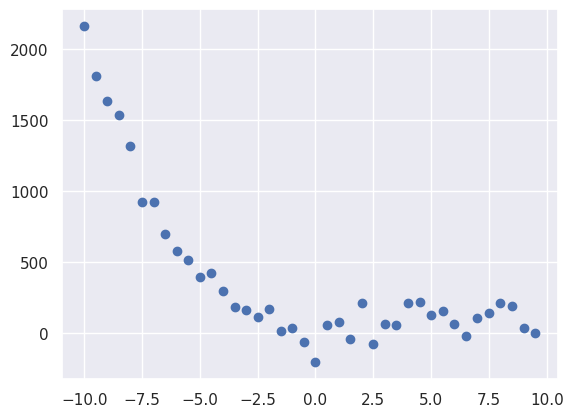

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

np.random.seed(0)
X = np.arange(-10, 10, 0.5)
noise = 80 * np.random.randn(40)
y = -X ** 3 + 10 * X ** 2 - 2 * X + 3 + noise
X = X.reshape(40, 1)
_ = plt.scatter(X, y)

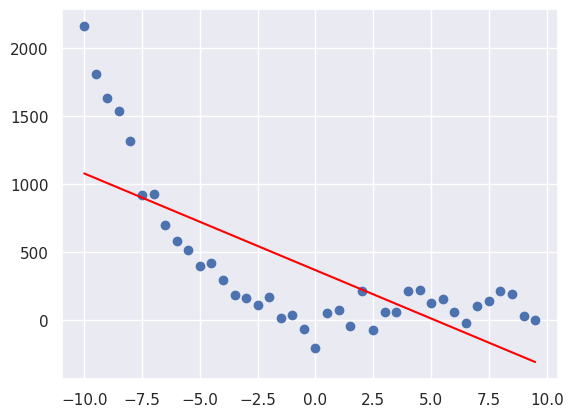

In [66]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X, y)
y_pred = regressor.predict(X)

plt.scatter(X, y)
_ = plt.plot(X, y_pred, c = 'red')

In [67]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.5398062344255777

Ekstrakcja cech wielomianowych - stopień 2

In [68]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)
X_poly

array([[  1.  , -10.  , 100.  ],
       [  1.  ,  -9.5 ,  90.25],
       [  1.  ,  -9.  ,  81.  ],
       [  1.  ,  -8.5 ,  72.25],
       [  1.  ,  -8.  ,  64.  ],
       [  1.  ,  -7.5 ,  56.25],
       [  1.  ,  -7.  ,  49.  ],
       [  1.  ,  -6.5 ,  42.25],
       [  1.  ,  -6.  ,  36.  ],
       [  1.  ,  -5.5 ,  30.25],
       [  1.  ,  -5.  ,  25.  ],
       [  1.  ,  -4.5 ,  20.25],
       [  1.  ,  -4.  ,  16.  ],
       [  1.  ,  -3.5 ,  12.25],
       [  1.  ,  -3.  ,   9.  ],
       [  1.  ,  -2.5 ,   6.25],
       [  1.  ,  -2.  ,   4.  ],
       [  1.  ,  -1.5 ,   2.25],
       [  1.  ,  -1.  ,   1.  ],
       [  1.  ,  -0.5 ,   0.25],
       [  1.  ,   0.  ,   0.  ],
       [  1.  ,   0.5 ,   0.25],
       [  1.  ,   1.  ,   1.  ],
       [  1.  ,   1.5 ,   2.25],
       [  1.  ,   2.  ,   4.  ],
       [  1.  ,   2.5 ,   6.25],
       [  1.  ,   3.  ,   9.  ],
       [  1.  ,   3.5 ,  12.25],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   4.5 ,  20.25],
       [  

Dopasowanie modelu

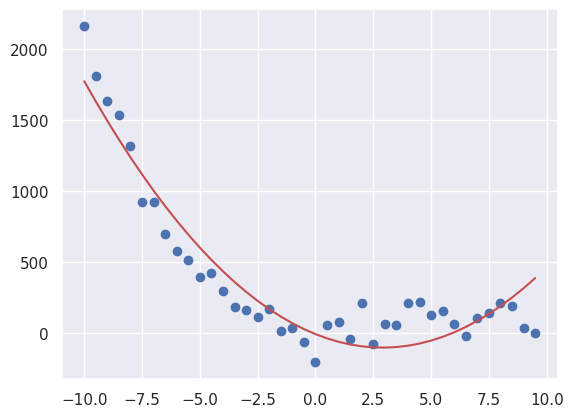

In [69]:
regressor_poly = LinearRegression()
regressor_poly.fit(X_poly, y)

y_pred = regressor_poly.predict(X_poly)

plt.scatter(X, y)
_ = plt.plot(X, y_pred, c = 'r')

In [70]:
r2_score(y, y_pred)

0.9000601519884677

Ekstracja cech wielomianowych - stopień 3

In [71]:
np.set_printoptions(suppress = True)

poly = PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(X)
X_poly

array([[    1.   ,   -10.   ,   100.   , -1000.   ],
       [    1.   ,    -9.5  ,    90.25 ,  -857.375],
       [    1.   ,    -9.   ,    81.   ,  -729.   ],
       [    1.   ,    -8.5  ,    72.25 ,  -614.125],
       [    1.   ,    -8.   ,    64.   ,  -512.   ],
       [    1.   ,    -7.5  ,    56.25 ,  -421.875],
       [    1.   ,    -7.   ,    49.   ,  -343.   ],
       [    1.   ,    -6.5  ,    42.25 ,  -274.625],
       [    1.   ,    -6.   ,    36.   ,  -216.   ],
       [    1.   ,    -5.5  ,    30.25 ,  -166.375],
       [    1.   ,    -5.   ,    25.   ,  -125.   ],
       [    1.   ,    -4.5  ,    20.25 ,   -91.125],
       [    1.   ,    -4.   ,    16.   ,   -64.   ],
       [    1.   ,    -3.5  ,    12.25 ,   -42.875],
       [    1.   ,    -3.   ,     9.   ,   -27.   ],
       [    1.   ,    -2.5  ,     6.25 ,   -15.625],
       [    1.   ,    -2.   ,     4.   ,    -8.   ],
       [    1.   ,    -1.5  ,     2.25 ,    -3.375],
       [    1.   ,    -1.   ,     1.   ,    -1

Dopasowanie modelu

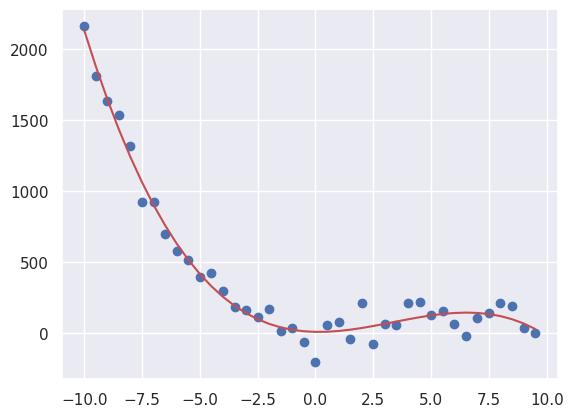

In [72]:
regressor_poly_3 = LinearRegression()
regressor_poly_3.fit(X_poly, y)

y_pred = regressor_poly_3.predict(X_poly)

plt.scatter(X, y)
_ = plt.plot(X, y_pred, c = 'r')

In [73]:
r2_score(y, y_pred)

0.9793138557357745

Regresja Logistyczna

In [74]:
import sklearn
sklearn.__version__

'1.2.2'

Text(0.5, 1.0, 'Sigmoid Function')

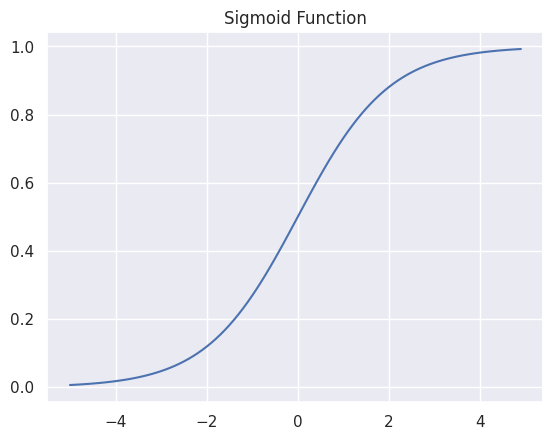

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns

sns.set()
np.random.seed(10)
np.set_printoptions(precision = 6, suppress = True)

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

X = np.arange(-5, 5, 0.1)
y = sigmoid(X)
plt.plot(X, y)
plt.title('Sigmoid Function')

Załadowanie danych

In [77]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
print(data)

{'data': array([[ 17.99   ,  10.38   , 122.8    , ...,   0.2654 ,   0.4601 ,
          0.1189 ],
       [ 20.57   ,  17.77   , 132.9    , ...,   0.186  ,   0.275  ,
          0.08902],
       [ 19.69   ,  21.25   , 130.     , ...,   0.243  ,   0.3613 ,
          0.08758],
       ...,
       [ 16.6    ,  28.08   , 108.3    , ...,   0.1418 ,   0.2218 ,
          0.0782 ],
       [ 20.6    ,  29.33   , 140.1    , ...,   0.265  ,   0.4087 ,
          0.124  ],
       [  7.76   ,  24.54   ,  47.92   , ...,   0.     ,   0.2871 ,
          0.07039]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [78]:
X = data.data
y = data.target

print(f'shape X: {X.shape}')
print(f'shape y: {y.shape}')

shape X: (569, 30)
shape y: (569,)


In [79]:
df = pd.DataFrame(data = X, columns = data.feature_names)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [80]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [81]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


Podział danych na zbiór treningowy i testowy

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (426, 30)
y_train shape: (426,)
X_test shape: (143, 30)
y_test shape: (143,)


Dopasowanie modelu

In [85]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

Predykcja na podstawie modelu

In [86]:
y_prob = classifier.predict_proba(X_test)
y_prob

array([[0.987288, 0.012712],
       [0.000164, 0.999836],
       [0.003309, 0.996691],
       [0.99953 , 0.00047 ],
       [0.006009, 0.993991],
       [0.020227, 0.979773],
       [0.00036 , 0.99964 ],
       [0.917094, 0.082906],
       [0.999998, 0.000002],
       [0.981512, 0.018488],
       [0.000183, 0.999817],
       [0.00061 , 0.99939 ],
       [0.597929, 0.402071],
       [0.001468, 0.998532],
       [0.999204, 0.000796],
       [0.99825 , 0.00175 ],
       [0.001337, 0.998663],
       [0.081787, 0.918213],
       [0.05906 , 0.94094 ],
       [0.996553, 0.003447],
       [0.639339, 0.360661],
       [0.147267, 0.852733],
       [0.006776, 0.993224],
       [0.055969, 0.944031],
       [1.      , 0.      ],
       [1.      , 0.      ],
       [0.086474, 0.913526],
       [1.      , 0.      ],
       [0.002395, 0.997605],
       [0.026593, 0.973407],
       [0.001833, 0.998167],
       [0.016511, 0.983489],
       [1.      , 0.      ],
       [0.001699, 0.998301],
       [0.0274

In [87]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0])

Ocena modelu

Accuracy: 0.9300699300699301


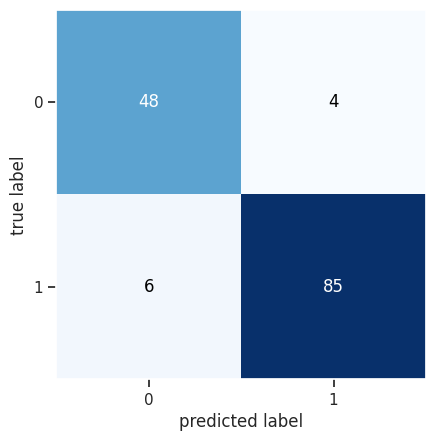

In [89]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns
sns.set()

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')

In [90]:
def plot_confusion_matrix(cm):
  # Binary classification
  cm = cm[::-1]
  cm = pd.DataFrame(cm, columns = ['pred_0', 'pred_1'], index = ['true_1', 'true_0'])

  fig = ff.create_annotated_heatmap(z = cm.values, x = list(cm.columns), y = list(cm.index),
                                    colorscale = 'ice', showscale = True, reversescale = True)
  fig.update_layout(width = 400, height = 400, title = f'Confusion Matrix, Accuracy: {acc:.4f}', font_size = 16)
  fig.show()

plot_confusion_matrix(cm)

In [91]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names = data.target_names))

              precision    recall  f1-score   support

   malignant       0.89      0.92      0.91        52
      benign       0.96      0.93      0.94        91

    accuracy                           0.93       143
   macro avg       0.92      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



Algorytm K-najbliższych sąsiadów

Import bibliotek

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set()

In [93]:
from sklearn.datasets import load_iris
raw_data = load_iris()
raw_data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [94]:
raw_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [95]:
df1 = pd.DataFrame(data = raw_data.data, columns = raw_data.feature_names)
df2 = pd.DataFrame(data = raw_data.target, columns = ['class'])
df = pd.concat([df1, df2], axis = 1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Wykres Rozproszenia

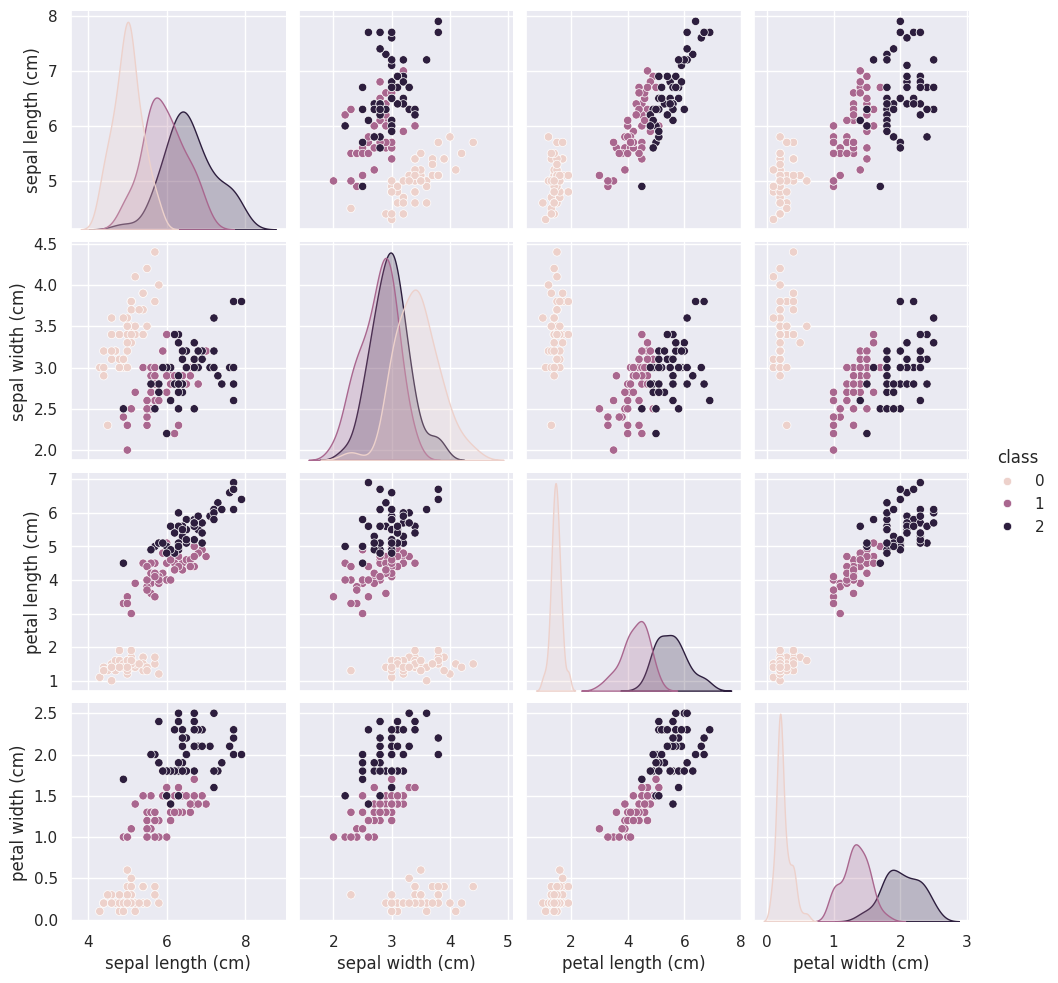

In [97]:
_ = sns.pairplot(df, hue = 'class')

In [98]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
class,0.782561,-0.426658,0.949035,0.956547,1.000000


In [99]:
X = raw_data.data
y = raw_data.target
X = X[:, :2]

print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (150, 2)
y shape: (150,)


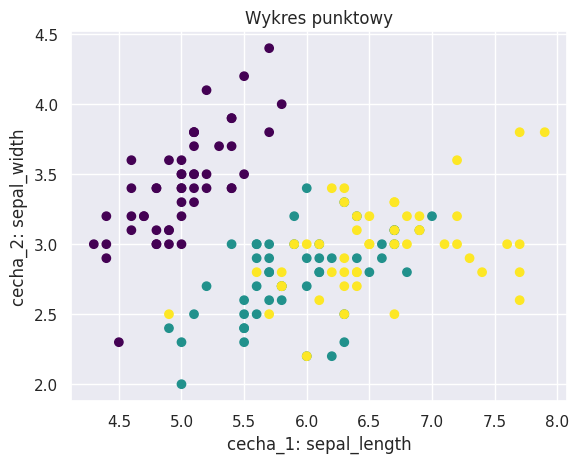

In [100]:
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = 'viridis')
plt.title('Wykres punktowy')
plt.xlabel('cecha_1: sepal_length')
plt.ylabel('cecha_2: sepal_width')
plt.show()

In [101]:
df = pd.DataFrame(X, columns = ['sepal_length', 'sepal_width'])
target = pd.DataFrame(y, columns = ['class'])
df = pd.concat([df, target], axis = 1)
px.scatter(df, x = 'sepal_length', y = 'sepal_width', color = 'class', width = 600, height = 400)

K-nearest Neighbors Classifier

In [102]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X, y)

KNeighborsClassifier()

In [104]:
accuracy = classifier.score(X, y)
accuracy

0.84

Wykres granic decyzyjnych

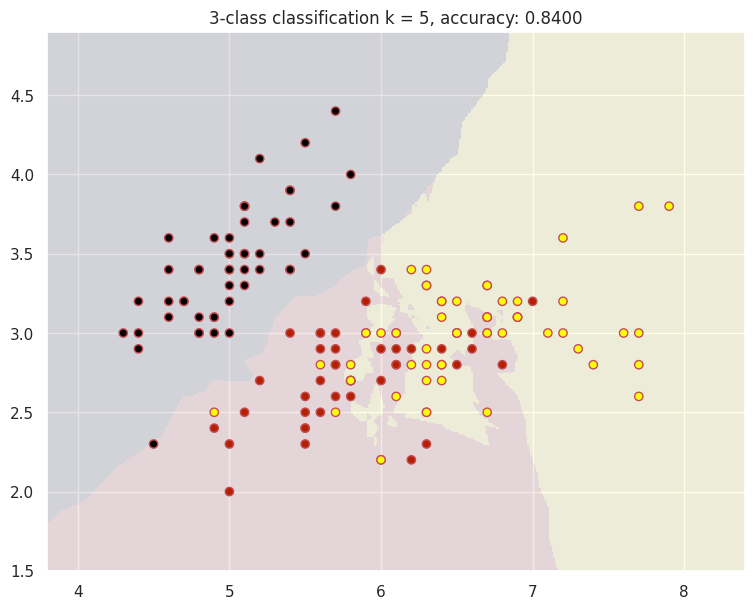

In [105]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
mesh = np.c_[xx.ravel(), yy.ravel()]
Z = classifier.predict(mesh)
Z = Z.reshape(xx.shape)

plt.figure(figsize = (9, 7))
plt.pcolormesh(xx, yy, Z, cmap = 'gnuplot', alpha = 0.1)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = 'gnuplot', edgecolors = 'r')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f'3-class classification k = 5, accuracy: {accuracy:.4f}')
plt.show()

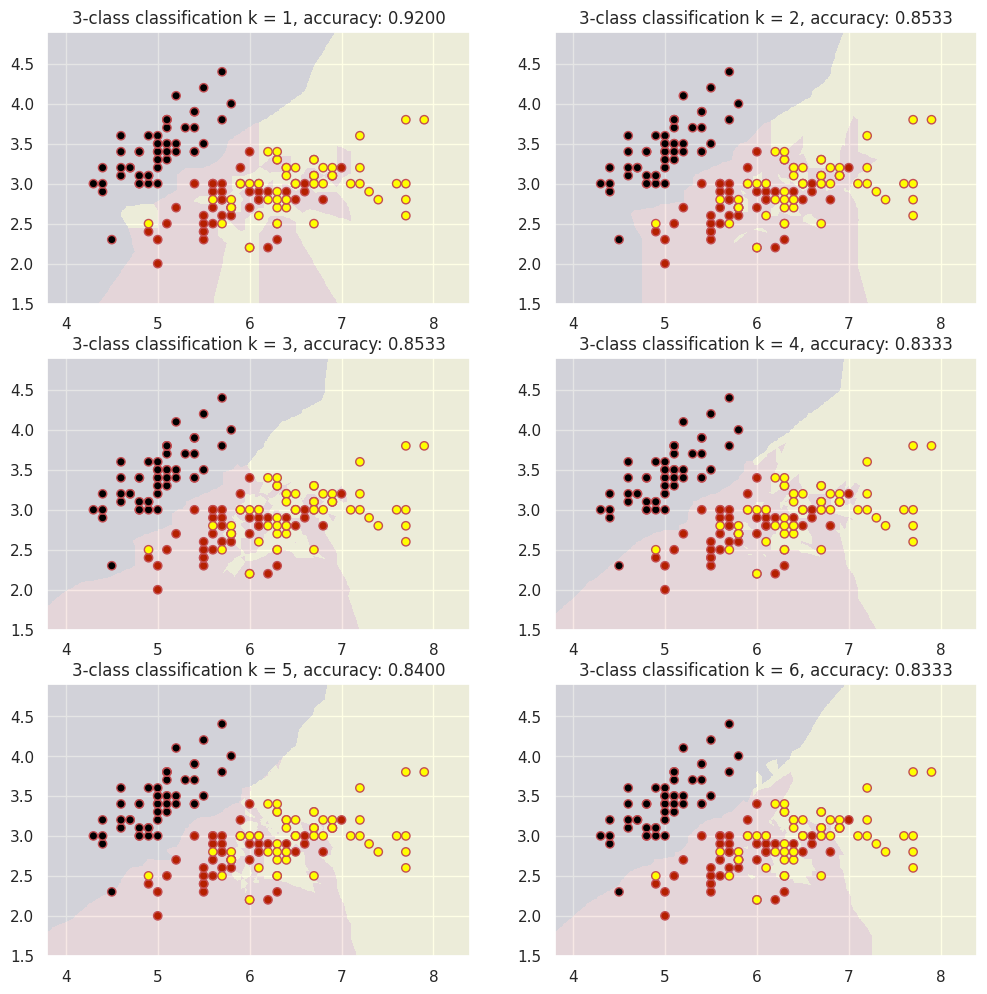

In [106]:
plt.figure(figsize = (12, 12))
for i in range(1, 7):
  plt.subplot(3, 2, i)
  classifier = KNeighborsClassifier(n_neighbors = i)
  classifier.fit(X, y)
  accuracy = classifier.score(X, y)
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
  mesh = np.c_[xx.ravel(), yy.ravel()]
  Z = classifier.predict(mesh)
  Z = Z.reshape(xx.shape)
  plt.pcolormesh(xx, yy, Z, cmap = 'gnuplot', alpha = 0.1)
  plt.scatter(X[:, 0], X[:, 1], c = y, cmap = 'gnuplot', edgecolors = 'r')
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.title(f'3-class classification k = {i}, accuracy: {accuracy:.4f}')
plt.show()

Grid Search

In [108]:
from sklearn.model_selection import GridSearchCV

grid_params = {'n_neighbors': range(2, 30)}

classifier = KNeighborsClassifier()

gs = GridSearchCV(classifier, grid_params, cv = 3)
gs.fit(X, y)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 30)})

In [110]:
gs.best_params_

{'n_neighbors': 6}

In [111]:
k = gs.best_params_['n_neighbors']
k

6

In [112]:
classifier = gs.best_estimator_
classifier

KNeighborsClassifier(n_neighbors=6)

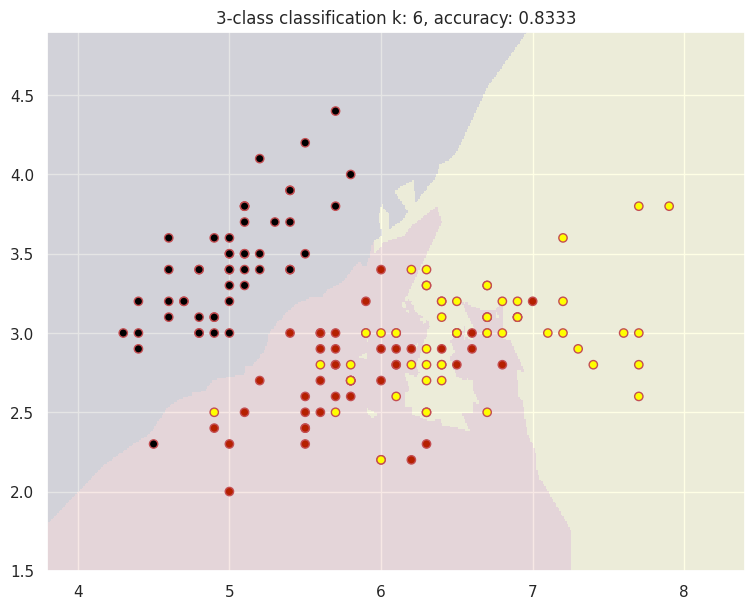

In [114]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
mesh = np.c_[xx.ravel(), yy.ravel()]
Z = gs.predict(mesh)
Z = Z.reshape(xx.shape)

plt.figure(figsize = (9, 7))
plt.pcolormesh(xx, yy, Z, cmap = 'gnuplot', alpha = 0.1)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = 'gnuplot', edgecolors = 'r')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f'3-class classification k: {k}, accuracy: {accuracy:.4f}')
plt.show()

Drzewo decyzyjne

Import bibliotek

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from IPython.display import Image

sns.set()
np.random.seed(10)

Załadowanie danych

In [166]:
iris = load_iris()
data = iris.data
targets = iris.target
feature_names = [name.replace(' ', '_')[:-5] for name in iris.feature_names]
class_names = iris.target_names

print(f'Liczba próbek: {len(data)}')
print(f'Kształt danych: {data.shape}')
print(f'Nazwy zmiennych objaśniających: {feature_names}')
print(f'Nazwy kategorii kosaćca: {class_names}')

Liczba próbek: 150
Kształt danych: (150, 4)
Nazwy zmiennych objaśniających: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Nazwy kategorii kosaćca: ['setosa' 'versicolor' 'virginica']


Eksploracja danych

Iris Setosa

In [167]:
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_setosa.jpg', width=200)

Iris Versicolor

In [168]:
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_versicolor.jpg', width=200)

Iris Virginica

In [169]:
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_virginica.jpg', width=200)

In [170]:
data_targets = np.c_[data, targets]
df = pd.DataFrame(data_targets, columns=feature_names + ['class'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [171]:
df.describe().T.apply(lambda x: round(x, 2))

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.84,0.83,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.06,0.44,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.76,1.77,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.20,0.76,0.1,0.3,1.30,1.8,2.5
class,150.0,1.00,0.82,0.0,0.0,1.00,2.0,2.0


In [175]:
plt.figure(figsize=(8, 6))
_ = sns.scatterplot('sepal_length', 'sepal_width', hue='class', data=df, legend='full', palette=sns.color_palette()[:3])

TypeError: scatterplot() got multiple values for argument 'data'

<Figure size 800x600 with 0 Axes>

In [176]:
plt.figure(figsize=(8, 6))
_ = sns.scatterplot('petal_length', 'petal_width', hue='class', data=df, legend='full', palette=sns.color_palette()[:3])

TypeError: scatterplot() got multiple values for argument 'data'

<Figure size 800x600 with 0 Axes>

In [126]:
df['class'].value_counts()

class
0.0    50
1.0    50
2.0    50
Name: count, dtype: int64

Przygotowanie danych do modelu

In [127]:
X = df.copy()
X = X[['petal_length', 'petal_width', 'class']]
y = X.pop('class')

In [128]:
X.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [129]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: class, dtype: float64

In [130]:
X = X.values
y = y.values.astype('int16')

Budowa klasyfikatora drzewa decyzyjnego

- max_depth = 1

In [131]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=1, random_state=30)
classifier.fit(X, y)

DecisionTreeClassifier(max_depth=1, random_state=30)

Wykreślenie granic decyzyjnych

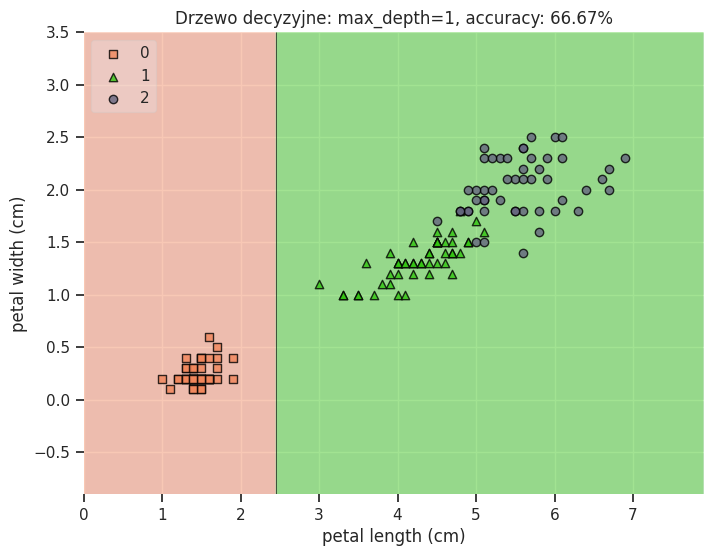

In [132]:
from mlxtend.plotting import plot_decision_regions

colors='#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf'

acc = classifier.score(X, y)

plt.figure(figsize=(8, 6))
plot_decision_regions(X, y, classifier, legend=2, colors=colors)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title(f'Drzewo decyzyjne: max_depth=1, accuracy: {acc * 100:.2f}%')
plt.show()

Graf drzewa decyzyjnego

- max_depth = 1

In [133]:
from sklearn.tree import export_graphviz

export_graphviz(classifier,
               out_file='iris_tree.dot',
               feature_names=iris.feature_names[2:],
               class_names=iris.target_names,
               rounded=True,
               filled=True)

Wyświetlenie grafu drzewa decyzyjnego

In [148]:
# pip install six

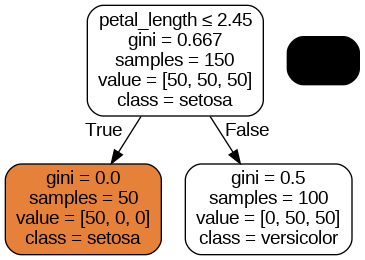

In [151]:
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(classifier,
               out_file=dot_data,
               feature_names=feature_names[2:],
               class_names=class_names,
               special_characters=True,
               rounded=True,
               filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('graph.png')
Image(graph.create_png(), width=250)

Budowa funkcji dla modelu drzewa decyzyjnego

In [152]:
def make_decision_tree(max_depth=1):
    # trenowanie modelu
    classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=30)
    classifier.fit(X, y)

    # eksport grafu drzewa
    dot_data = StringIO()
    export_graphviz(classifier,
                   out_file=dot_data,
                   feature_names=feature_names[2:],
                   class_names=class_names,
                   special_characters=True,
                   rounded=True,
                   filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png('graph.png')

    # obliczenie dokładności
    acc = classifier.score(X, y)

    # wykreślenie granic decyzyjnych
    colors='#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf'
    plt.figure(figsize=(8, 6))
    ax = plot_decision_regions(X, y, classifier, legend=0, colors=colors)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['setosa', 'versicolor', 'virginica'], framealpha=0.3)
    plt.xlabel('petal length (cm)')
    plt.ylabel('petal width (cm)')
    plt.title(f'Drzewo decyzyjne: max_depth={max_depth}, accuracy={acc * 100:.2f}')

    return Image(graph.create_png(), width=150 + max_depth * 80)

- max_depth = 2

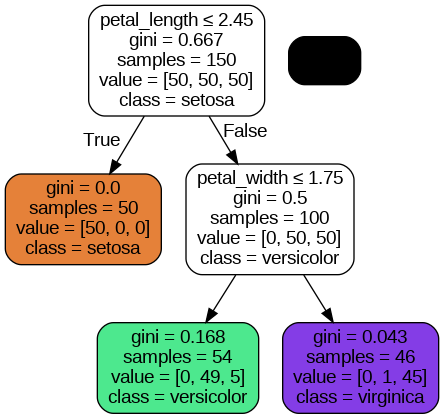

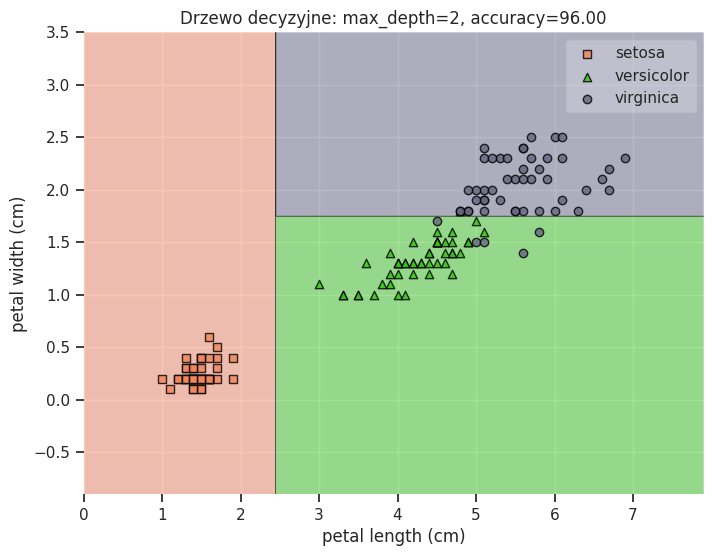

In [153]:
make_decision_tree(max_depth=2)

- max_depth = 3

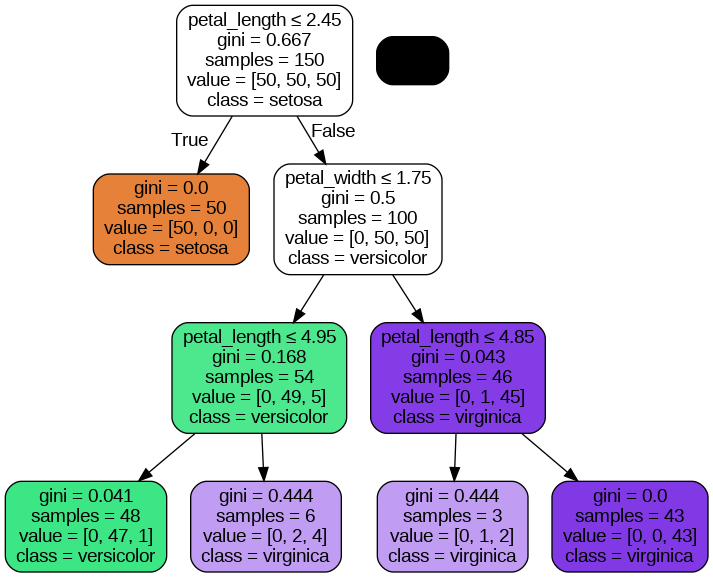

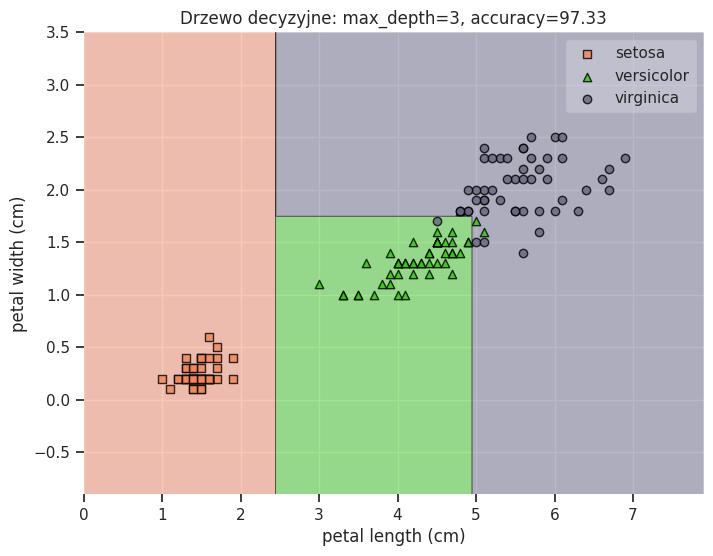

In [154]:
make_decision_tree(max_depth = 3)

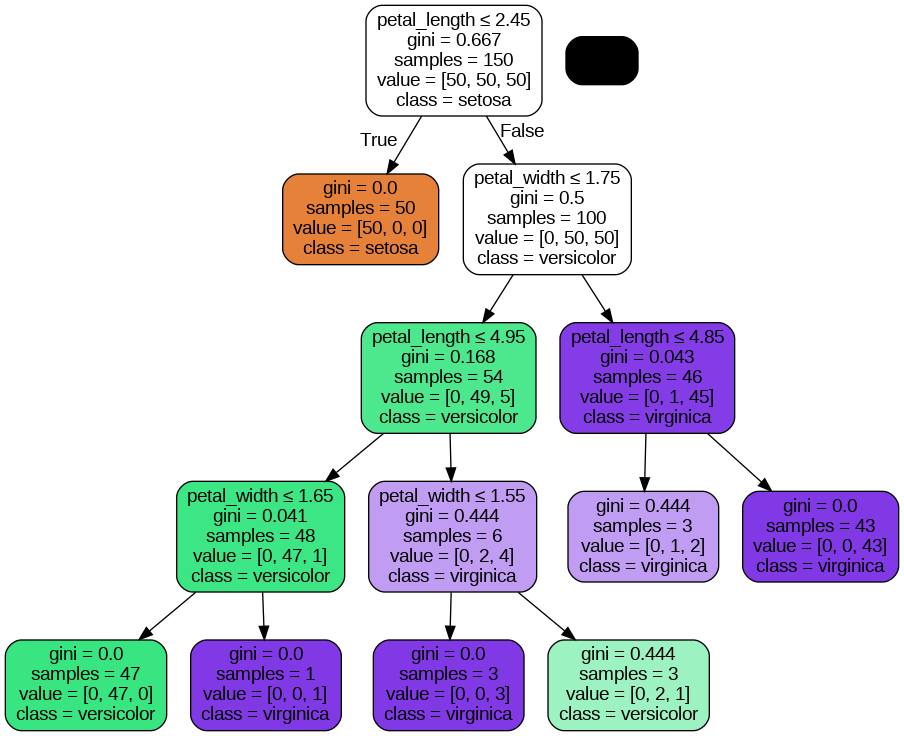

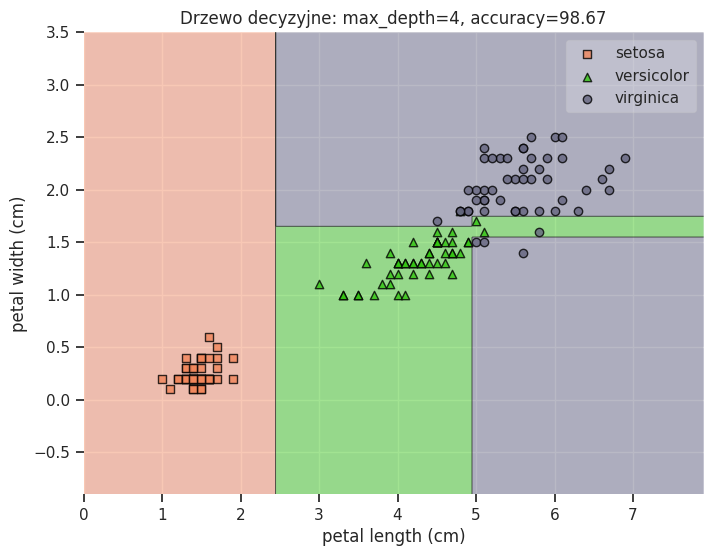

In [155]:
make_decision_tree(max_depth = 4)

- max_depth = 5

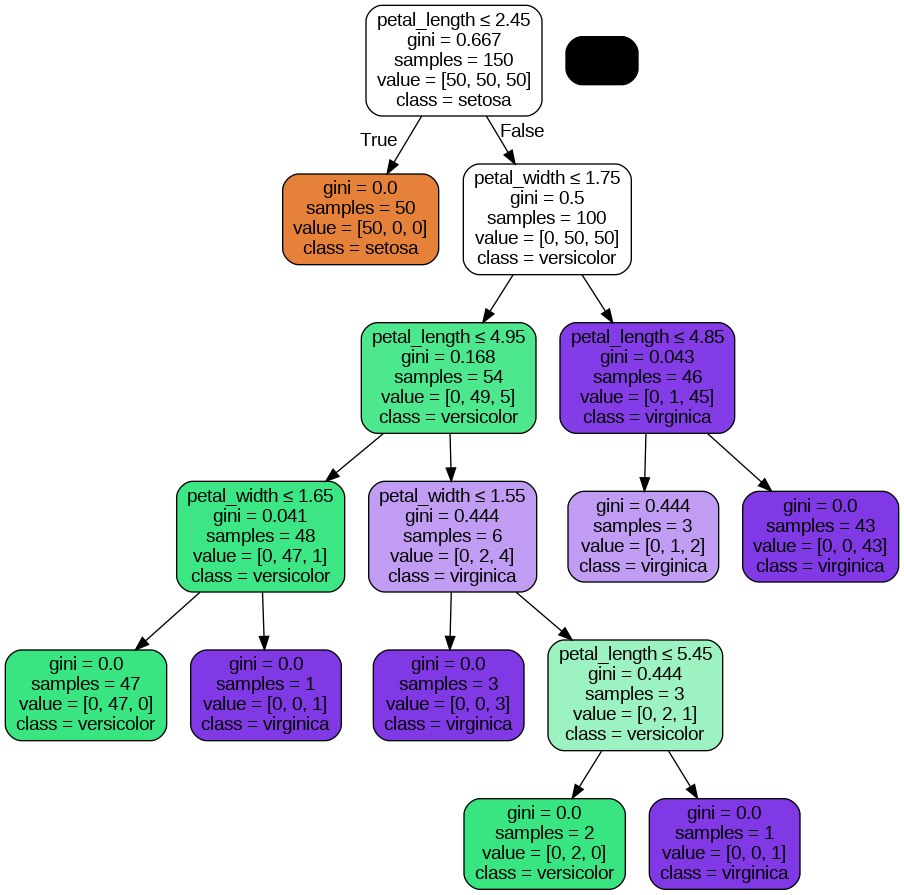

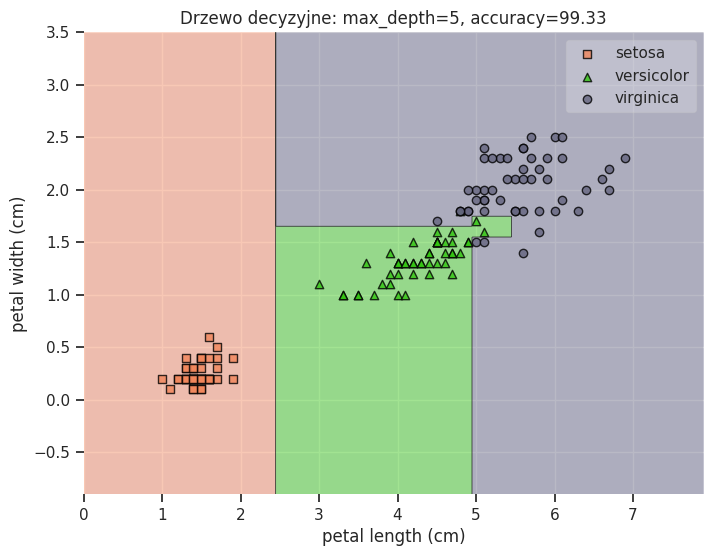

In [156]:
make_decision_tree(max_depth=5)